## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
#mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

**DATASET**



Since 2008, guests and hosts have been using Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

In [ ]:
#import dataset
data=pd.read_csv('/content/drive/MyDrive/Almabetter/capstone projects/Airbnb/Airbnb NYC 2019.csv')

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#shape of the dataset
print(f'The shape of dataset is {data.shape}')

The shape of dataset is (48895, 16)


In [ ]:
#basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

There are 16 features that provide a very rich amount of information for data exploration. It shows some missing values, which will require cleaning and handling of NaN values.

In [ ]:
#finding out columns that have null values
#using 'sum' function to show # nulls found in each column
missing_data= data.isnull().sum()


In [ ]:
missing_data

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

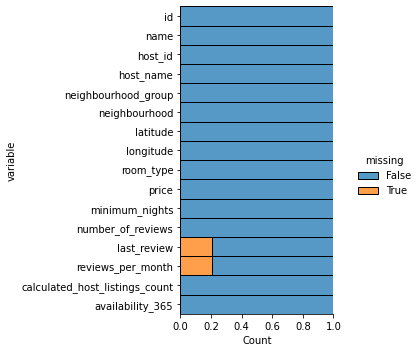

In [ ]:
sns.displot(data=data.isna().melt(value_name='missing'), y='variable', hue='missing', multiple='fill',aspect=1)


In [ ]:
#calculating the percentage of missing values
total_rows = np.product(data.shape)
total_missing =  missing_data.sum()
percentage_missing = np.round((total_missing / total_rows) * 100, 2)
print("Percentage of missing values in the dataset:", percentage_missing)

Percentage of missing values in the dataset: 2.57


As seen in displot, there is around 2% of data missing, specifically 2.57% from columns namely **last_review, reviews_per_month, name, host_name**. 

HANDLING MISSING VALUES IN DATASET 

Missing values of categorical columns can be filled with dummy variable.

In [ ]:
#Missing values of columns "name" and "host_name" are filled with dummy variable - "Unknown".
data['name'].fillna(value = 'Unknown', axis = 'index', inplace = True)
data['host_name'].fillna(value = 'Unknown', axis = 'index', inplace = True)

Missing values of numerical columns are imputed with suitable numbers.

In our case, column "review_per_month" missing values can be imputed with 0.0 for missing values since "number_of_review" of corresponding column has a 0.


In [ ]:
data.fillna({'reviews_per_month':0}, inplace=True)

Irrelevant columns with missing values are dropped. 

In [ ]:
#Column "last_review" is of type date; For rows with no reviews of the listing - date doesn't exist. Hence considering this column as irrelevant, It's dropped.
data.drop(['last_review'], axis=1, inplace=True)


In [ ]:
#Cross-check the Null Values
data.isnull().sum()


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#Descriptive statistics for numerical values
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Observation:

For the feature "price", the mean value is 152.7 whereas minimum and maximum are 0 USD and 10000 USD resp. Where 0 price seems illogical and extremely high priced listings cause skewness in its distribution. 


In [171]:
print("Skewness of price: %f" % data['price'].skew())
print("Kurtosis of price: %f" % data['price'].kurt())

Skewness of price: 19.118939
Kurtosis of price: 585.672879


Acceptable values of skewness: -3 to +3 
Acceptable values of kurtosis: -10 to 10 

Therefore the skewness and kurtosis of price are quite high

#  Skewness measure of the features

In [ ]:
#excluding the features with lower significance 
c= set(data.columns)-{'latitude','longitude','id','host_id'}
c_list= data[c].describe().columns.to_list()

In [ ]:
data[c].describe()

,price,calculated_host_listings_count,availability_365,minimum_nights,number_of_reviews,reviews_per_month
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.143982,112.781327,7.029962,23.274466,1.090910
std,240.154170,32.952519,131.622289,20.510550,44.550582,1.597283
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,69.000000,1.000000,0.000000,1.000000,1.000000,0.040000
50%,106.000000,1.000000,45.000000,3.000000,5.000000,0.370000
75%,175.000000,2.000000,227.000000,5.000000,24.000000,1.580000
max,10000.000000,327.000000,365.000000,1250.000000,629.000000,58.500000


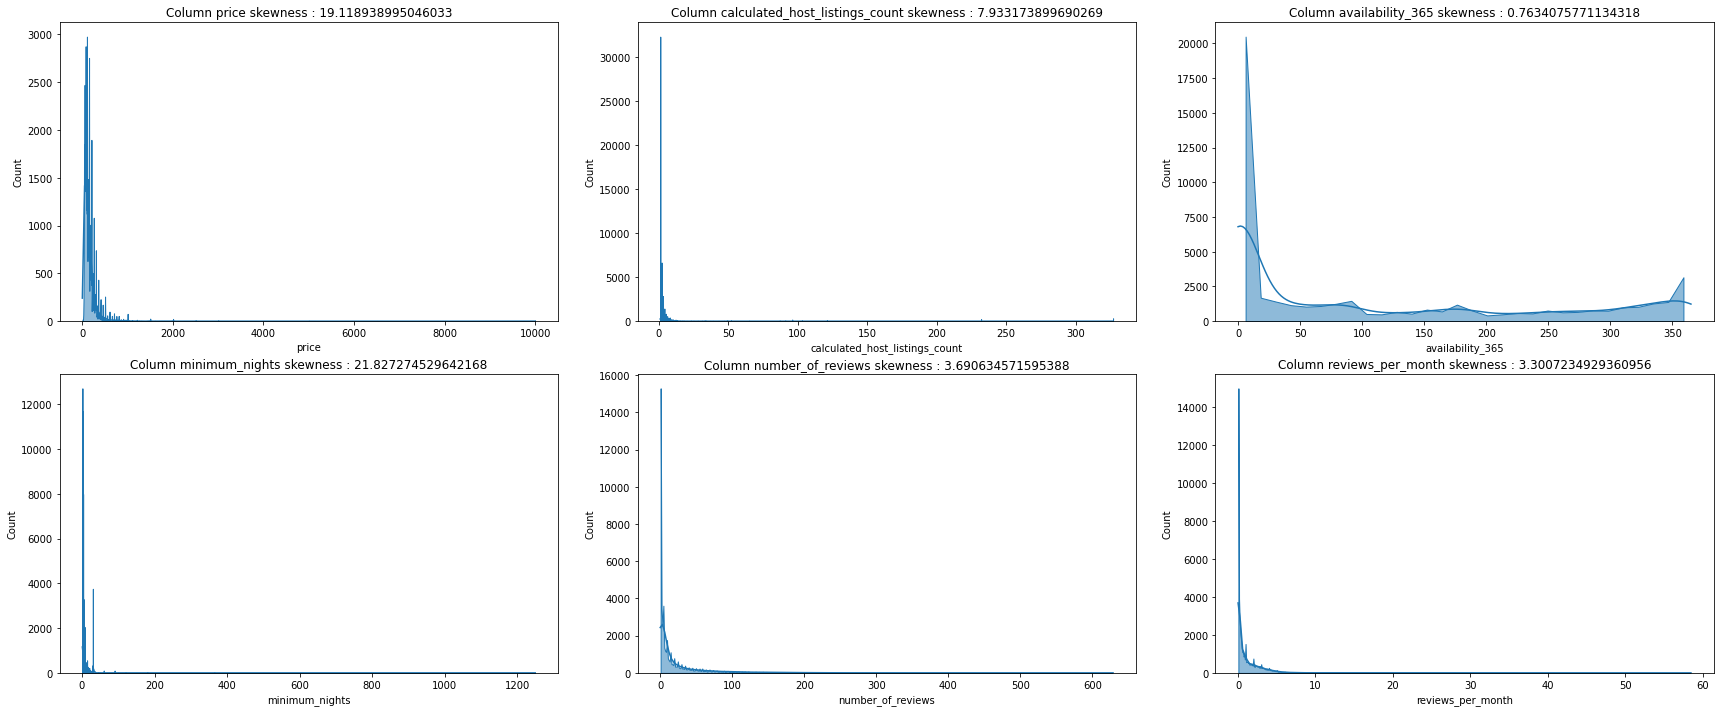

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
axes = axes.flatten()
for col, ax in zip(c_list, axes):
    sns.histplot(x=col, data=data, ax=ax, kde=True, element='poly')
    ax.set_title(f'Column {col} skewness : {data[col].skew()}')
 
plt.tight_layout(h_pad=0.5, w_pad=0.8)


From the above graphs, it can be concluded that, all the features namely "price", "calculated_host_listings_count", "reviews_per_month", "number_of_reviews", "minimum_nights", "availability_365"  have **positively skewed distribution.**




---



# Finding Correlation among features of dataset:

In [ ]:
co_relation = data[c].corr()
#correlation among valid numerical features 

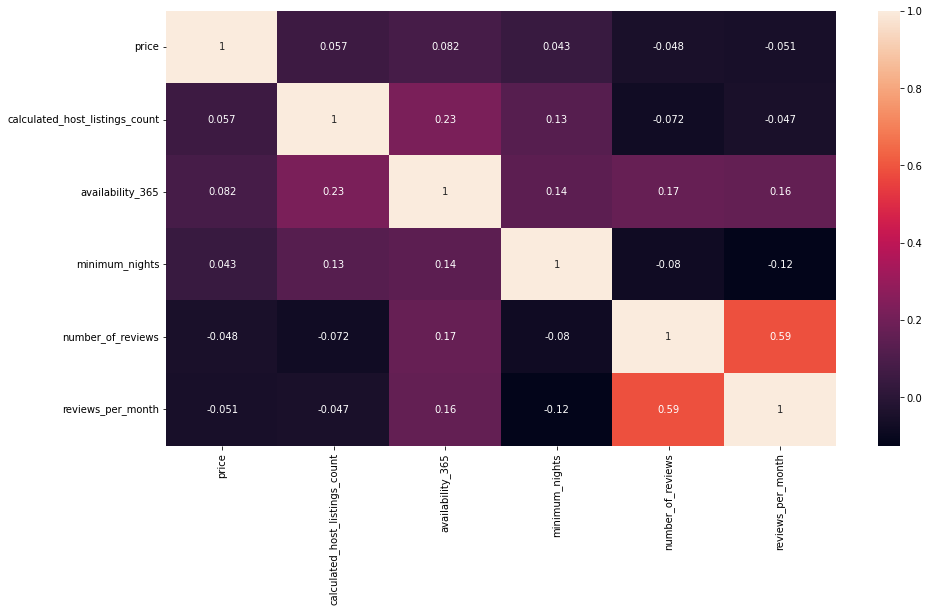

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(co_relation, annot=True)

Observation:
* Highly correlated features are "number_of_reviews" and "reviews_per_month". 
* No significant correlation between any other features of the dataset.



---



DISCOVERING KEY UNDERSTANDINGS


1. What can we learn about different hosts and areas?
2. What can we learn from predictions? (ex: locations, prices, reviews, etc)
3. Which hosts are the busiest and why?
4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?




# *1. What can we learn about different hosts and areas?*



---



---




Hosts with most number of listings 

In [ ]:
data['host_name'].nunique()
#This shows the unique number of hosts. Hence using "host_id" feature to differentiate the rows uniquely.

11453

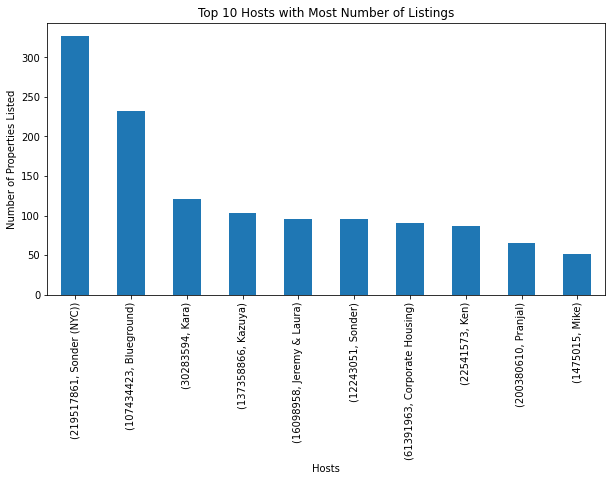

In [ ]:
#host having highest amount of properties listed.
most_listings_host = data.groupby(['host_id', 'host_name'])['calculated_host_listings_count'].count().sort_values(ascending=False)[:10]
most_listings_host.plot.bar(figsize=(10,5))
plt.xlabel('Hosts')
plt.ylabel('Number of Properties Listed')
plt.title('Top 10 Hosts with Most Number of Listings');

Concluding that the host **Sonder(NYC)** has the highest number of listings: 327




---



Hosts with the highest number of reviews 

In [ ]:
#sort the dataset based on # reviews 
highest_reviews = data.sort_values(by='number_of_reviews', ascending=False)[:10]

In [ ]:
highest_reviews.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173


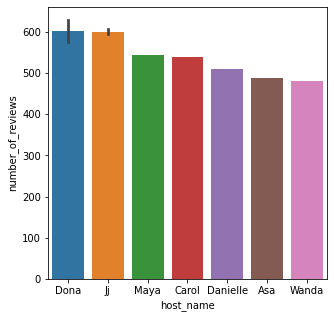

In [ ]:
plt.rcParams['figure.figsize'] = (5,5)
ax = sns.barplot(x = highest_reviews['host_name'], y = data['number_of_reviews'], data = highest_reviews)

It can be observed that the host with most number of reviews isn't the same as host with most listings 



---



Host with the highest earnings

In [169]:
#Top earning hosts
#calculating the mean price of each hosts to define the most earning ones.
top_earning_hosts = data.groupby(['host_id','host_name'])['price'].agg("mean").reset_index().sort_values(by='price', ascending=False)[0:10]
top_earning_hosts  = top_earning_hosts .round(decimals = 2)


In [170]:
top_earning_hosts

,host_id,host_name,price
26778,72390391,Jelena,10000.0
16313,20582832,Kathrine,10000.0
7693,5143901,Erin,10000.0
6985,4382127,Matt,9999.0
6315,3906464,Amy,9999.0
2516,1235070,Olson,9999.0
15382,18128455,Rum,8500.0
9663,7407743,Jack,7500.0
20817,35303743,Patricia,6500.0
12496,11598359,Jonathan,6500.0


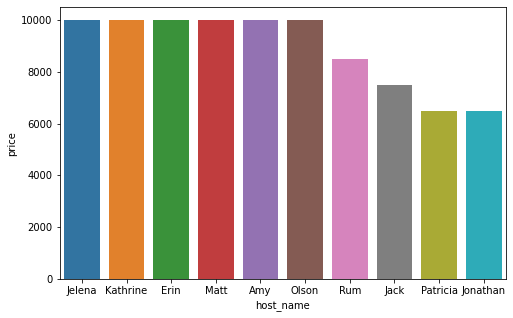

In [ ]:
plt.rcParams['figure.figsize'] = (8,5)
ax = sns.barplot(x = top_earning_hosts['host_name'], y = top_earning_hosts['price'], data = top_earning_hosts)



---



Number of listings in each neighbourhood groups 

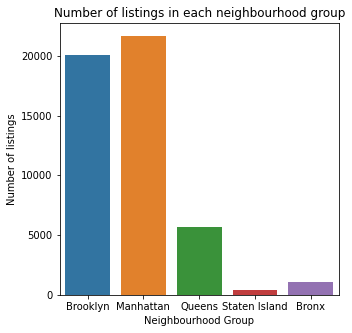

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data['neighbourhood_group'])
fig = plt.gcf()
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings in each neighbourhood group')
plt.show()

Manhattan has the highest number of listings compared to other neighbourhood groups. Staten Island has the lowest number of listings.



---



Area distribution of neighbourhood groups 

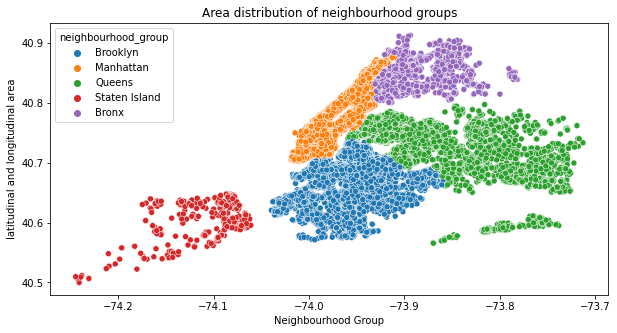

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('latitudinal and longitudinal area')
ax.set_title('Area distribution of neighbourhood groups')
plt.show()



---



# 2. What can we learn from predictions? (ex: locations, prices, reviews, etc)


---



---



1. Variation of price across the neighbourhood groups for all room types.







In [ ]:
# Price comparison for each neighbourhood.
room_based_price = data.groupby(['room_type','neighbourhood_group'], as_index=False)['price'].agg('mean')
room_based_price.sort_values(by='price', ascending=False, inplace=True)
room_based_price.head()

,room_type,neighbourhood_group,price
2,Entire home/apt,Manhattan,249.239109
1,Entire home/apt,Brooklyn,178.327545
4,Entire home/apt,Staten Island,173.846591
3,Entire home/apt,Queens,147.050573
0,Entire home/apt,Bronx,127.506596


Manhattan has the most expensive listings overall that can be illustrated using below lineplot

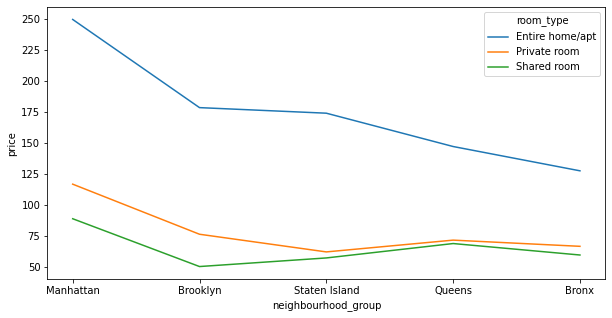

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=room_based_price, x = 'neighbourhood_group', y = 'price',hue ='room_type')

Conclusion: 
* Most private rooms are of medium price, hence being affordable and opted by many
* Manhattan has highest avg price for all room types
* Entire home/apt room type has the highest avg price in all neighbourhood groups.



---



2. Number of reviews per neighbourhood groups  

In [ ]:
#grouby neighbourhood groups and find number of reviews per each group. Arranged in decreasing fashion of reviews
areas_reviews = data.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)


In [ ]:
areas_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


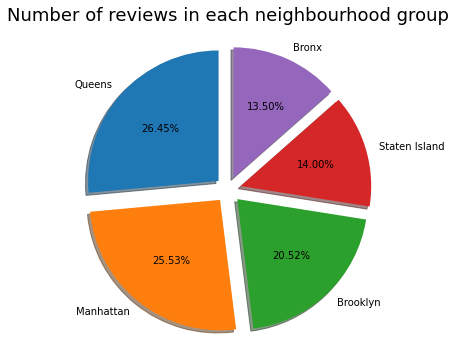

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 18})
plt.show()

Queens and Manhattan are the most likable neighbourhood groups with the most reviews (assuming reviews to be positive only )



---



---



3. Describing the distribution of price among neighbourhoods




In [ ]:
# Price relation with respect to Location - (Price vs Location)
#considering only 2000 highly priced neighbourhoods 
neighbourhood_price= data[['neighbourhood', 'price']].sort_values(by = 'price', ascending = False)[:2000]

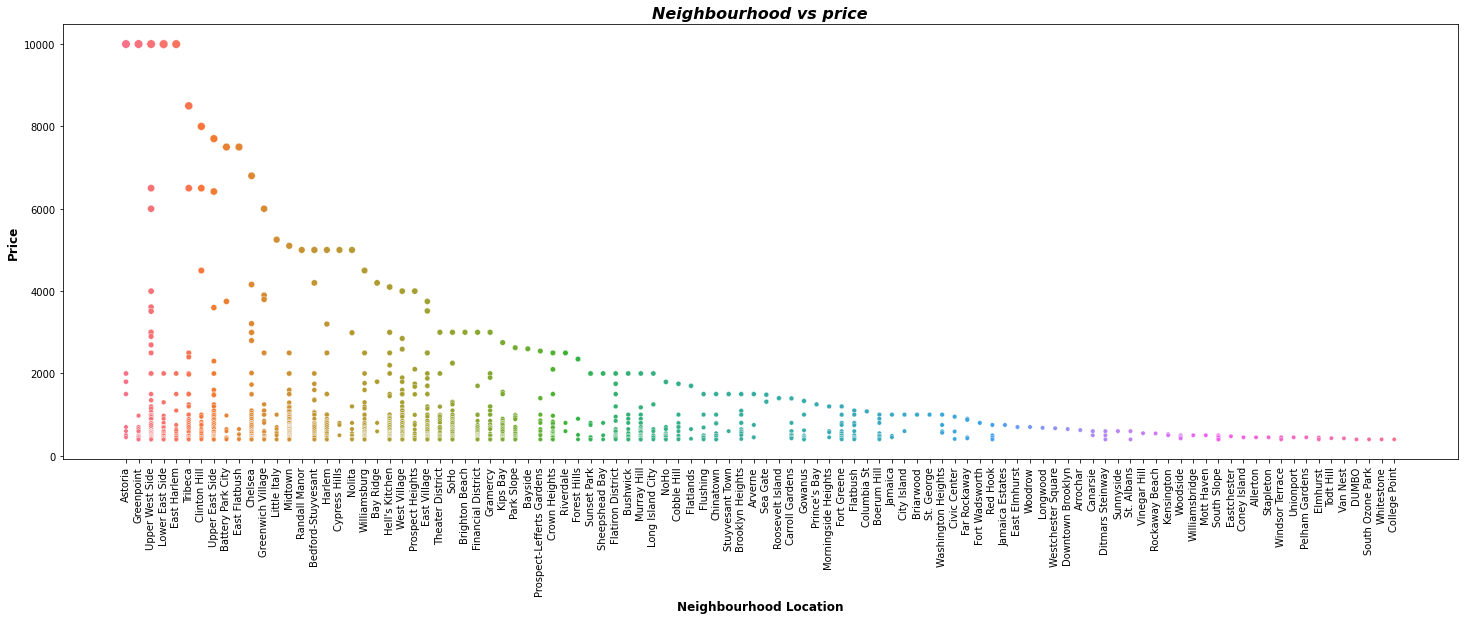

In [ ]:
plt.figure(figsize=(25,8))
sns.scatterplot(y = 'price', x = 'neighbourhood', hue = 'neighbourhood', size = 'price',data = neighbourhood_price,legend = False)
plt.xticks(rotation = 'vertical')
plt.title('Neighbourhood vs price', fontsize = 16, fontweight = 'bold', fontstyle = 'italic')
plt.xlabel('Neighbourhood Location', fontsize = 12, fontweight = 'bold')
plt.ylabel('Price', fontsize = 12, fontweight = 'bold')
plt.show()

4. Describing the distribution of reviews with respect to neighbourhoods 

---



In [ ]:
neighbourhood_price= data[['neighbourhood', 'number_of_reviews']].sort_values(by = 'number_of_reviews', ascending = False)[:2000]


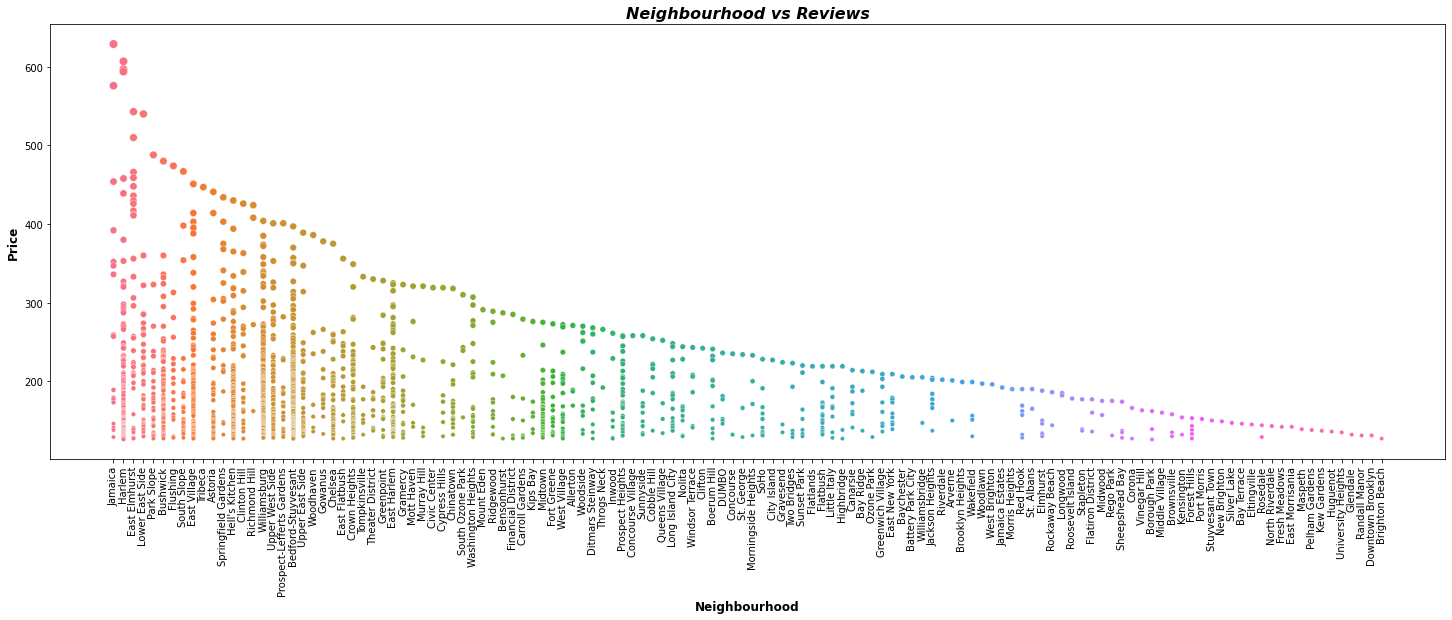

In [ ]:
plt.figure(figsize=(25,8))
sns.scatterplot(y = 'number_of_reviews', x = 'neighbourhood', hue = 'neighbourhood', size = 'number_of_reviews',data = neighbourhood_price,legend = False)
plt.xticks(rotation = 'vertical')
plt.title('Neighbourhood vs Reviews', fontsize = 16, fontweight = 'bold', fontstyle = 'italic')
plt.xlabel('Neighbourhood', fontsize = 12, fontweight = 'bold')
plt.ylabel('Price', fontsize = 12, fontweight = 'bold')
plt.show()

* Some of the highly reviewed places like Jamaica, Harlem, Flushing have moderate or low priced listings. Explaining affordability.
* While some places like Bushwick, Williamsburg constitute the maximum number of listings leading to higher reviews.
* Thus most reviewed places can come from many factors such as affordability, more number of listings in the area, and economical importance.



---



---



# 3. Which hosts are the busiest and why?

---





Neighbourhoods with the most number of listings 

In [ ]:
areas_count = data['neighbourhood'].value_counts()[0:10]
areas_count

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

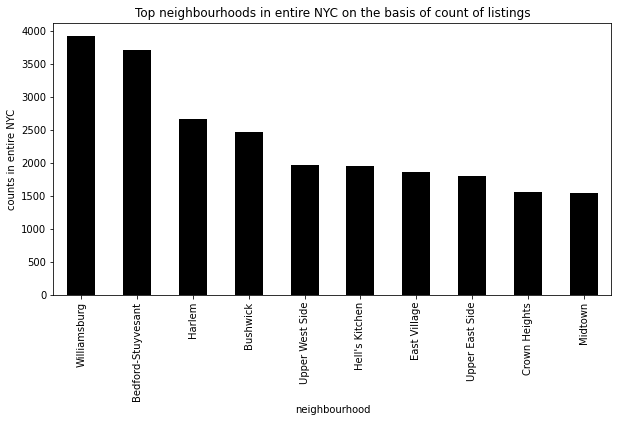

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)

top_10_neigbours= data['neighbourhood'].value_counts()[:10] 
#checking top 10 neighbourhoods on the basis of no of listings in entire NYC
top_10_neigbours.plot(kind='bar',color='black')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

Number of listings of each room types





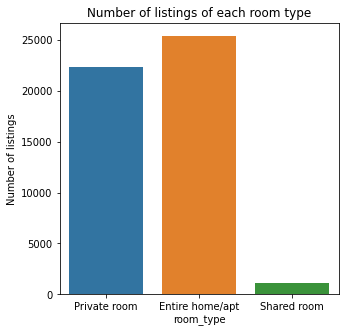

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data['room_type'])
fig = plt.gcf()
ax.set_xlabel('room_type')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings of each room type')
plt.show()

Entire home/apt are the most preferred room_types

In [ ]:
#Busiest hosts would be those who have maximum number of reviews as people are booking frequently at those hosts.
busiest_hosts = data.groupby(['host_name','neighbourhood','neighbourhood_group','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,neighbourhood,neighbourhood_group,room_type,number_of_reviews
8260,Dona,Jamaica,Queens,Private room,629
14701,Jj,Harlem,Manhattan,Private room,607
21154,Maya,East Elmhurst,Queens,Private room,543
5085,Carol,Lower East Side,Manhattan,Private room,540
7200,Danielle,East Elmhurst,Queens,Private room,510
3078,Asa,Park Slope,Brooklyn,Entire home/apt,488
31468,Wanda,Bushwick,Brooklyn,Private room,480
18608,Linda,Flushing,Queens,Private room,474
7060,Dani,South Slope,Brooklyn,Entire home/apt,467
2235,Angela,East Elmhurst,Queens,Private room,466


Conclusion:
The above mentioned hosts are the busiest due to following reasons:

*    The private room and Entire home/apt are the most preferred room types  according to above histogram plot.
*    Neighbourhood groups Queens and Manhattan have maximum number of reviews {**assuming the reviews to be positive**} as seen in [pie chart here](https://colab.research.google.com/drive/1J6CQlgfMOzsss4GIV1kQwrbQ-yqbxuMQ#scrollTo=yMvLRsBqTU8w&line=1&uniqifier=1https://)
*    Dona from Jamaica, Queens is the busiest host according to the number of reviews. (**assuming the reviews to be positive**)






---



---



#4. Is there any noticeable difference of traffic among different areas and what could be the reason for it

Relation between number of reviews and price, neighbourhood group and room type

In [ ]:
data.groupby(['neighbourhood_group','neighbourhood','room_type','price'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False).head(10)

,neighbourhood_group,neighbourhood,room_type,price,number_of_reviews
12337,Queens,Jamaica,Private room,47,629
7394,Manhattan,Harlem,Private room,49,607
11717,Queens,East Elmhurst,Private room,46,543
8447,Manhattan,Lower East Side,Private room,99,540
11718,Queens,East Elmhurst,Private room,48,510
4083,Brooklyn,Park Slope,Entire home/apt,160,488
1811,Brooklyn,Bushwick,Private room,60,480
11963,Queens,Flushing,Private room,55,474
4673,Brooklyn,South Slope,Entire home/apt,120,467
11730,Queens,East Elmhurst,Private room,65,466


* **Assuming all the reviews to be positive**, Jamaica with highest number of reviews can be traffic proned. 
* It can be observed that most highly reviewed listings are private rooms that are of average and low price, being easy to afford.

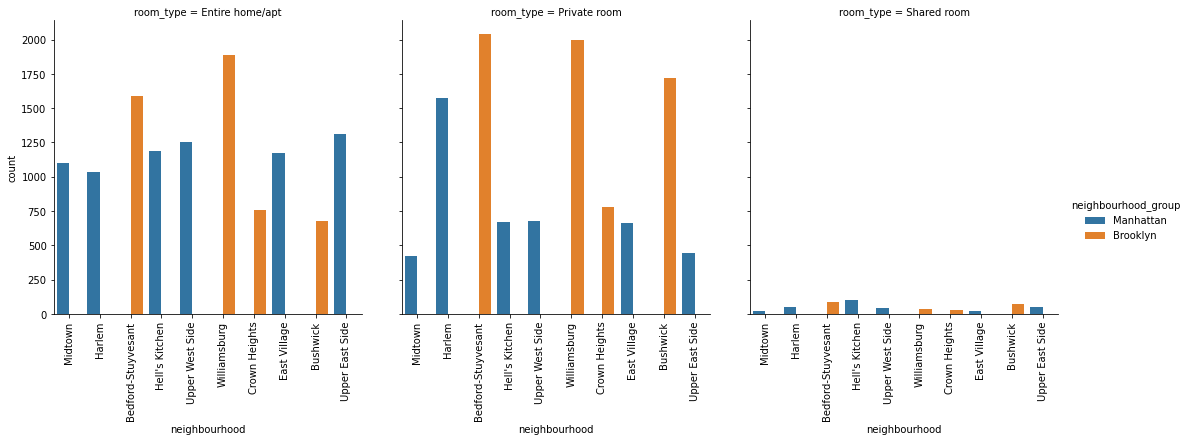

In [ ]:
#using catplot to represent number of listings in top 10 highly listed neighbourhoods of different room type.
sub=data.loc[data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub, kind='count')
viz_3.set_xticklabels(rotation=90)

Observation: 

* For these  top 10 neighborhoods since Manhattan and Brooklyn are the most busiest destinations, also with most number of listings. 
* Bedford-Stuyvesant and Williamsburg are the most popular for Brooklyn, and Harlem for Manhattan.
* 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. 

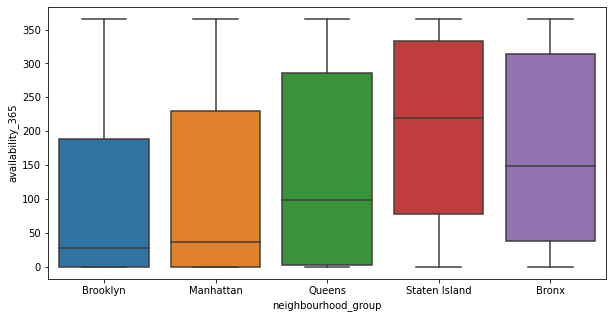

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=data, x='neighbourhood_group',y='availability_365')

The mean availability of Brooklyn shows that it has got least number of availabilities. Hence it can be said that the listings in Brooklyn are seldom available and mostly booked. Which implies there is high possibility of the group being prone to traffic. 

Followed by Manhattan, Queens, Bronx and Staten Island.

In [ ]:

data.groupby(['neighbourhood','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index().sort_values(by='calculated_host_listings_count', ascending=False)[0:10]


,neighbourhood,neighbourhood_group,calculated_host_listings_count
214,Williamsburg,Brooklyn,3920
13,Bedford-Stuyvesant,Brooklyn,3714
94,Harlem,Manhattan,2658
28,Bushwick,Brooklyn,2465
202,Upper West Side,Manhattan,1971
95,Hell's Kitchen,Manhattan,1958
64,East Village,Manhattan,1853
201,Upper East Side,Manhattan,1798
51,Crown Heights,Brooklyn,1564
127,Midtown,Manhattan,1545


The most listed neighbourhoods belong to Brooklyn and Manhattan.

**Conclusion :**
 Why there is noticeable traffic in most areas



*   Most of the neighbourhoods with high number of listings are present in Manhattan neighbourhood group makeing it a busy place.
*   The private rooms are mostly of average price, which makes them affordable to wide range of people.
*   The neighbourhoods with most number of listings like- Bedford-Stuyvesant, Williamsburg from Brooklyn  and Harlem from Manhattan, have most number of private rooms explaining the traffic there. 
*   Highy reviewed places mostly have average/ low price. Thus high traffic seen.
*   Though the shared rooms have least average price, due to lesser number of listings of type shared room, the traffic cannot be expected.
*   Thus, number of listings, number of reviews, affordability etc contribute for traffic in certain areas





---



---





---



# Calculation of Average Revenue.




In [ ]:
data1=data
data1['revenue'] = (365-data1['availability_365'])*data1['price']
data1['total_revenue'] = data1.groupby('host_id')['revenue'].transform(sum)
data1['average_revenue'] = data1['total_revenue']/data1['calculated_host_listings_count']

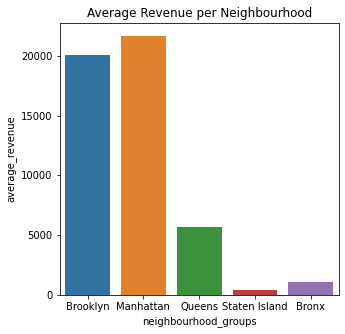

In [ ]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data1['neighbourhood_group'])
fig = plt.gcf()
ax.set_xlabel('neighbourhood_groups')
ax.set_ylabel('average_revenue')
ax.set_title('Average Revenue per Neighbourhood')
plt.show()

The average revenue of Manhattan is highest due to it's busy nature, presence of neighbourhoods with high number of listings and low average availability as seen in [boxplot](https://colab.research.google.com/drive/1J6CQlgfMOzsss4GIV1kQwrbQ-yqbxuMQ#scrollTo=U2rQ0TbkDO-D&line=1&uniqifier=1).



---



Distribution  of price among neighbourhood groups 

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

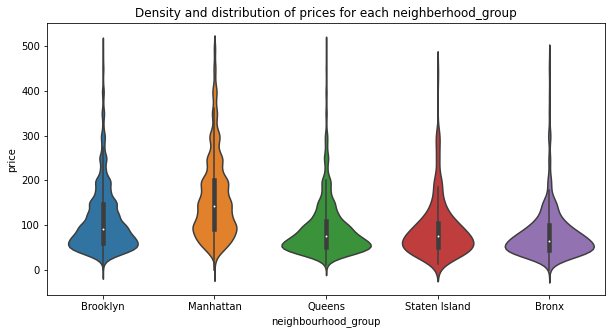

In [ ]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub=data[data.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')


Price distribution for neighbourhood groups can be observed. 
* Brooklyn has an avg price of $80.

* Manhattan has highest range of price with average around $150.

* Queens and Staten Ialand have almost similar distributions with average price around $50.

* Bronx is the cheapest neighbourhood group. 




---



---



---



CONCLUSION

This Airbnb ('AB_NYC_2019') dataset allows us to perform data exploration on most of the columns.
Starting with the data cleaning, handling missing values, distribution and correlation, we have moved on to answer few of the key understandings.
1. Talking about host with most number of listings, most number of reviews and top earning hosts includes the analysis on feature-host.
Next we have explored the neighbourhood groups with most listings and its geographical distribution. 

2. We explored various relations to learn from predictions.

*   Variation of price across the neighbourhood groups for all room types.
*   Number of reviews per neighbourhood groups
*   Describing the distribution of price among neighbourhoods
*   Describing the distribution of reviews among neighbourhoods

3. Analysed the busiest host based on neighbourhoods with most listings, number of listings of each room type and most number of reviews.

4. Explained the reason for traffic in some areas using relation between number of reviews and price, neighbourhood group and room type and availability among different neighbourhood groups using boxplot.

5. Calculated the average revenue per host and plotted it for different neighbourhood groups 

6. Depicted the price distribution among neighbourhood groups using Violin plot.

It would have been better if the reviews were broken down into positive and negative one or scaled (0-5). Which helps in making analysis more stronger.
However throughout this analysis we have assumed reviews to be positive only.